# Problem Statement
This project understands how student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, lunch, and test prep course

# Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv

This data contains 8 columns and 1000 rows

# Importing req packages and data
numpy, pandas, matplotlib, seaborn, warnings libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dataset Information
### 1) gender - male/female
### 2) race/ethnicity - groups (A,B,C,D,E)
### 3)parental level of educcation - bachelors's degree, some college, masters, associates, high school, some high school
### 4)lunch - standard, free/reduced
### 5)test prep course - none, completed
### 6)math score
### 7)reading score
### 8)writing score


# Data checks to perform
### 1) duplicates
### 2) missing values
### 3) data type check
### 4) check number of unique values in each col
### 5) Stats of data
### 6) Check various categories present in diff categorical problem

# checking missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### No missing values found

# checking duplicates

In [8]:

df.duplicated().sum()

0

### There are no duplicate values in the dataset

# Checking the datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# checking number of unique values in the dataset

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Checking stats of the dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 1) from the above description the mean scores are very close to eachother
### 2) all standard deviations vals are close to eachother
### 3) min value for math is 0, writing has slightly higher score is 10, then highest mini score if for reading

# Exploring the data

In [12]:
print("Categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [13]:
# define numerical and categorical columns
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_feature), numeric_feature))
print('\n We have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

 We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# total score and average score

In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full  = df[df['reading_score'] == 100]['average_score'].count()
writing_full  = df[df['writing_score'] == 100]['average_score'].count()
math_full  = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in reading:  {reading_full}')
print(f'Number of students with full marks in writing:  {writing_full}')
print(f'Number of students with full marks in math:  {math_full}')

Number of students with full marks in reading:  17
Number of students with full marks in writing:  14
Number of students with full marks in math:  7


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in reading:  {reading_less_20}')
print(f'Number of students with less than 20 marks in writing:  {writing_less_20}')
print(f'Number of students with less than 20 marks in math:  {math_less_20}')

Number of students with less than 20 marks in reading:  1
Number of students with less than 20 marks in writing:  3
Number of students with less than 20 marks in math:  4


## Insights
### 1) Worst performance in math section
### 2) Best performance in reading section

# Visualization

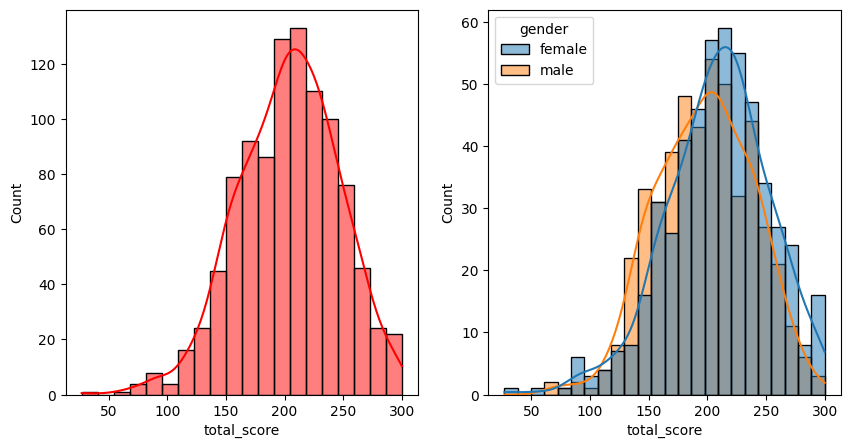

In [18]:
plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=20, kde=True, color='r')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

### Female students perform well than the male students

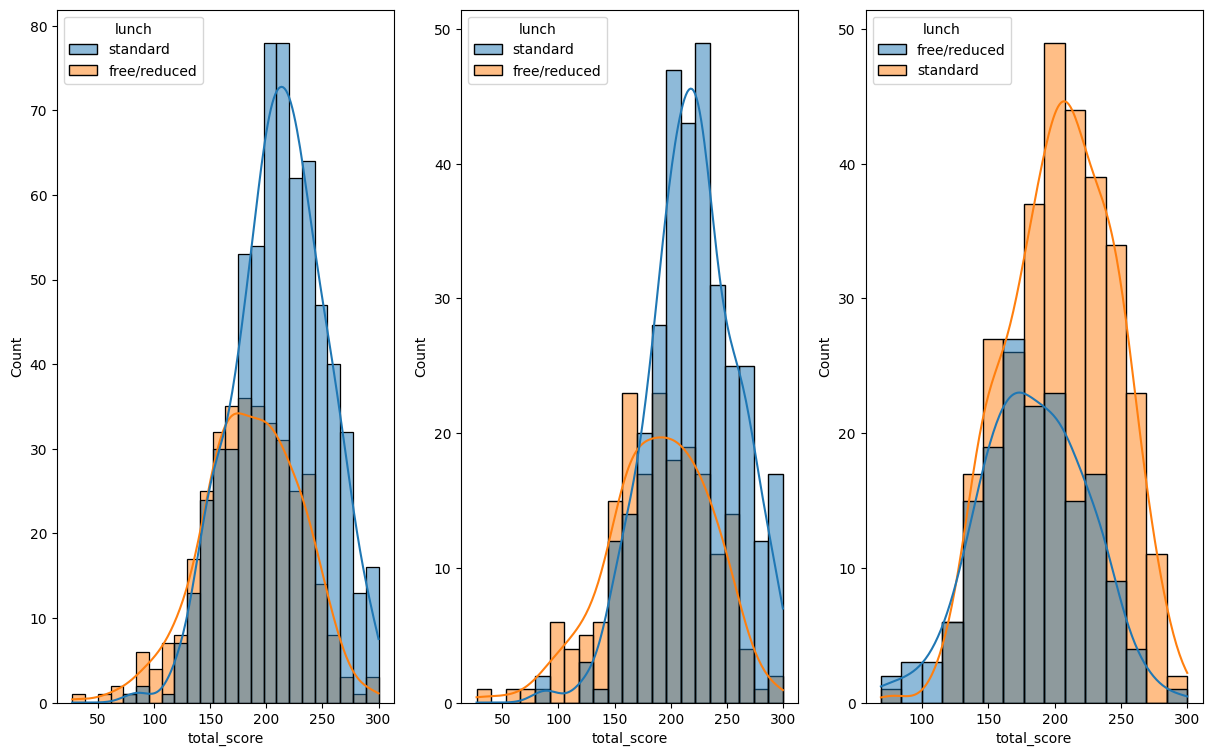

In [19]:
plt.subplots(1, 3, figsize=(20,9))
plt.subplot(141)
sns.histplot(data=df, x='total_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='total_score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='total_score', kde=True, hue='lunch')
plt.show()

### Standard lunch students perform well be it male or female compared to the free/reduced ones

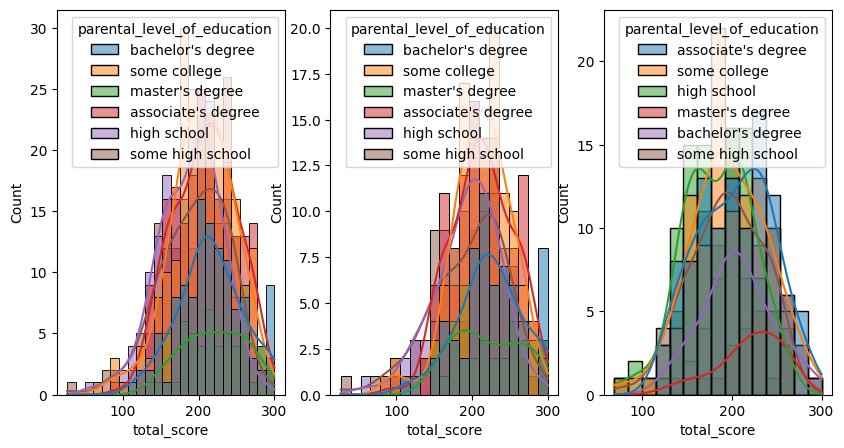

In [20]:
plt.subplots(1,2, figsize=(10,5))
plt.subplot(131)
sns.histplot(data=df, x='total_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='total_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='total_score', kde=True, hue='parental_level_of_education')
plt.show()

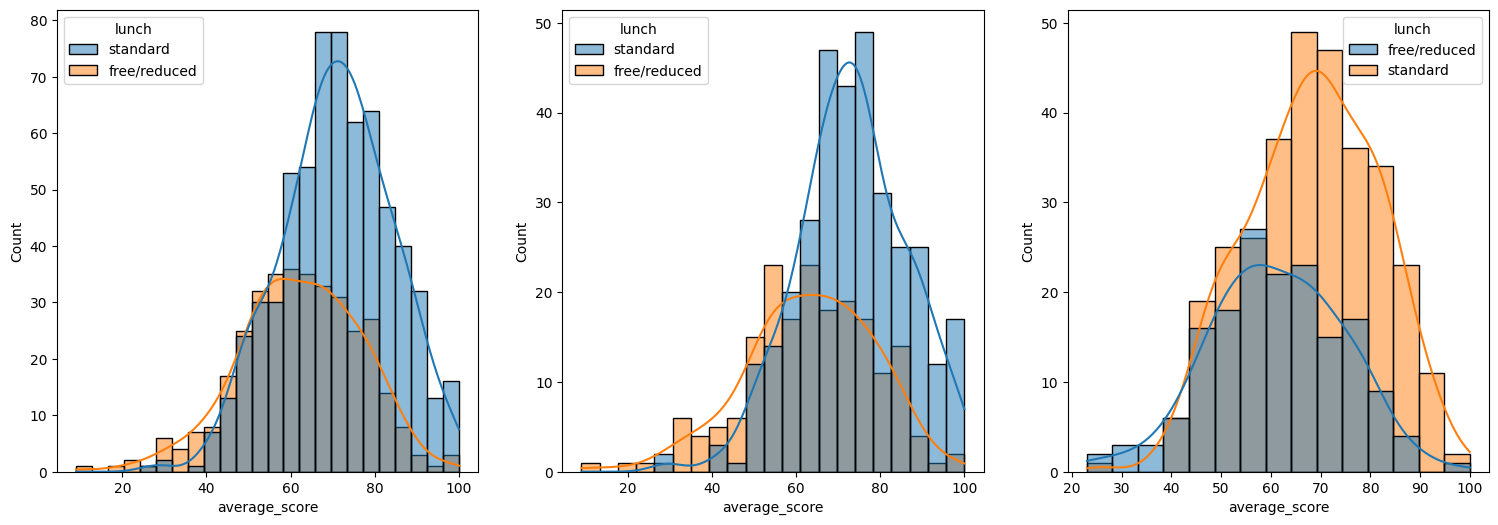

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

### Standard lunch students perform well in exams

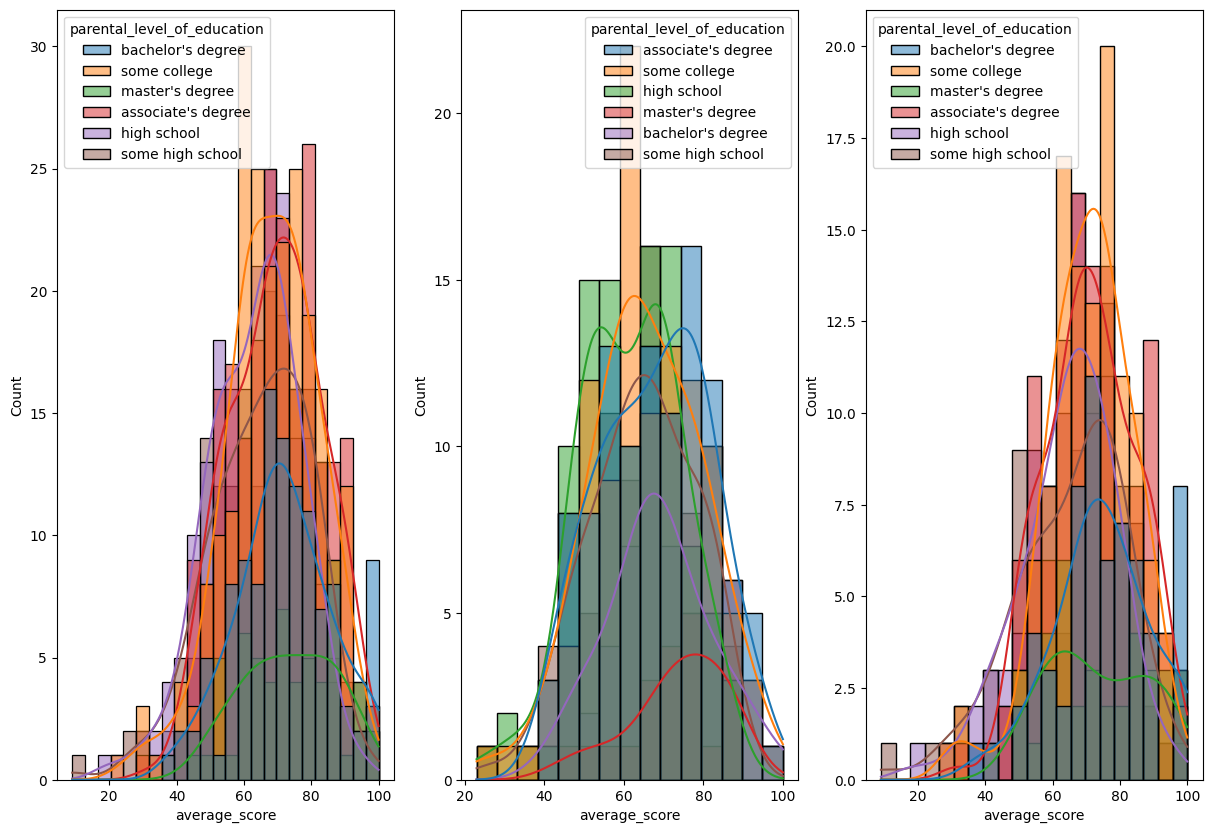

In [22]:
plt.subplots(1,3,figsize=(20,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

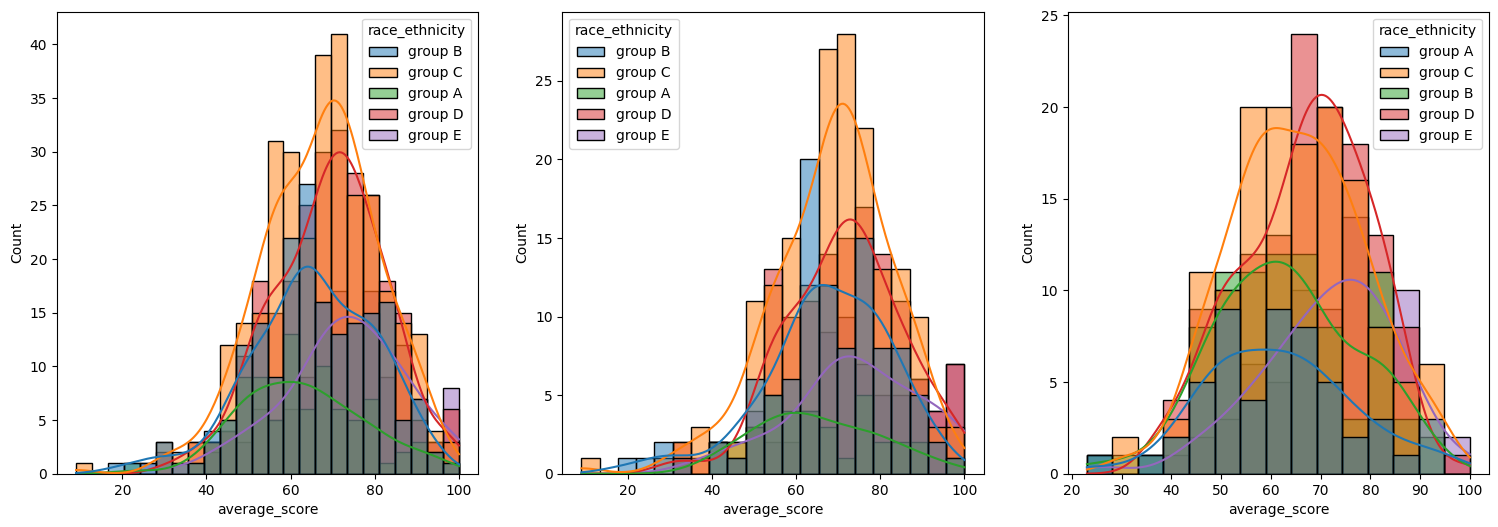

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

## Insights

### 1) Group C has the highest average score among all groups in females
### 2) Whereas in males Group D gets the highest average score among all groups
### 3) Group A and B perform very poor in exams

# Maximum scores of students in all 3 subjects

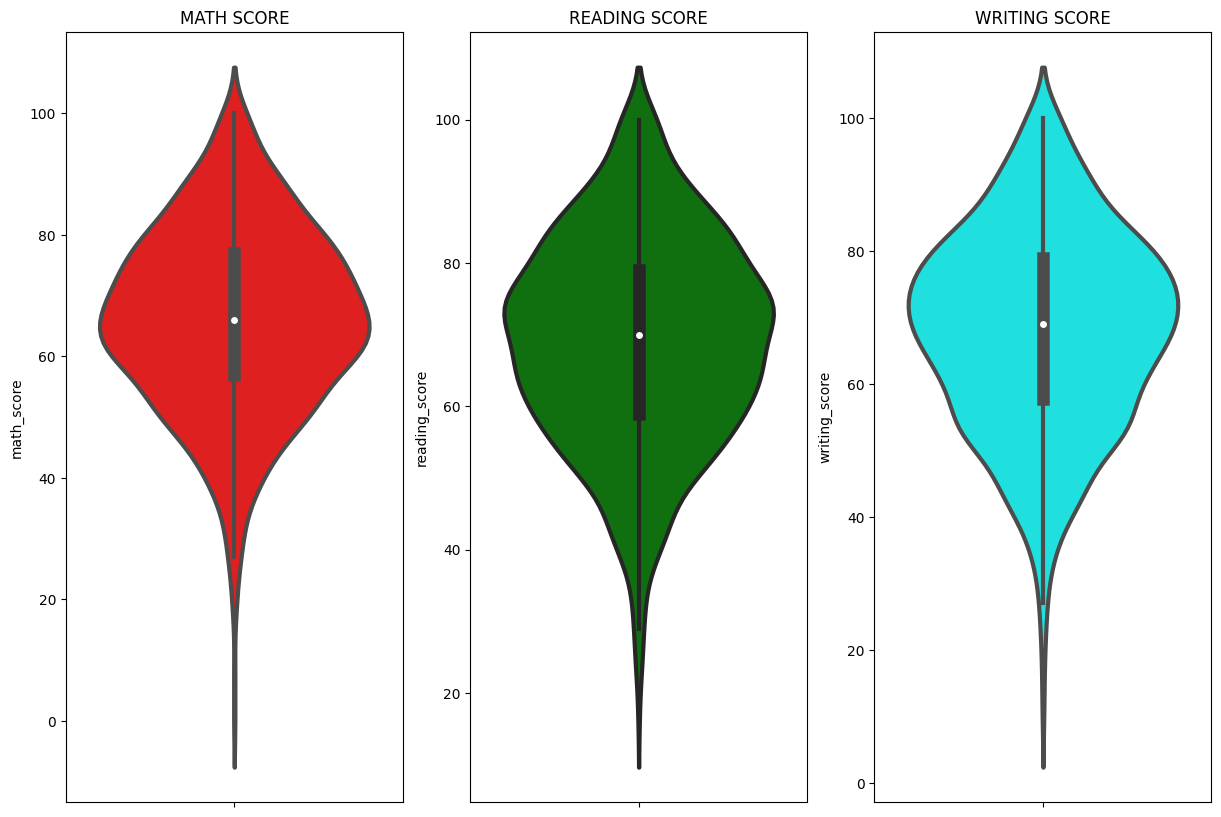

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title("MATH SCORE")
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(142)
plt.title("READING SCORE")
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(143)
plt.title("WRITING SCORE")
sns.violinplot(y='writing_score', data=df, color='cyan', linewidth=3)
plt.show()

## Insights
### 1) math score is from 60 to 80
### 2) reading and writing scores are from 50 to 80

In [25]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

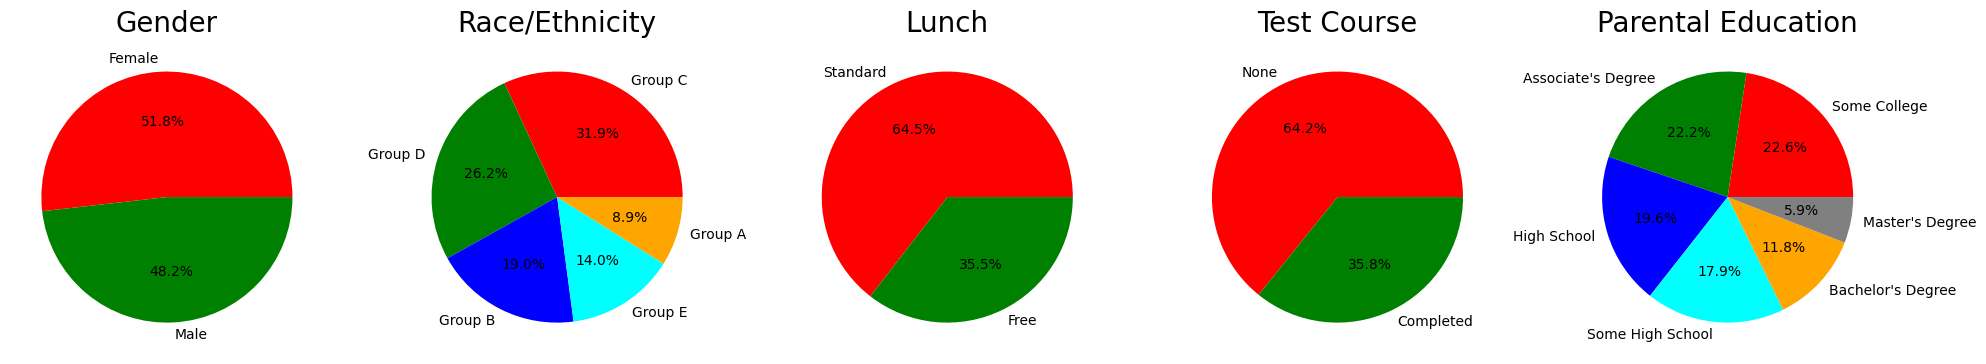

In [26]:
# MULTIVARIATE ANALYSIS (USING PIEPLOT)
plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%')
plt.title('Gender', fontsize = 20)




plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Race/Ethnicity', fontsize = 20)




plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Lunch', fontsize = 20)



plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Test Course', fontsize = 20)



plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Parental Education', fontsize = 20)



plt.tight_layout()

plt.show()

# Feature-wise Visualization

## GENDER COLUMN

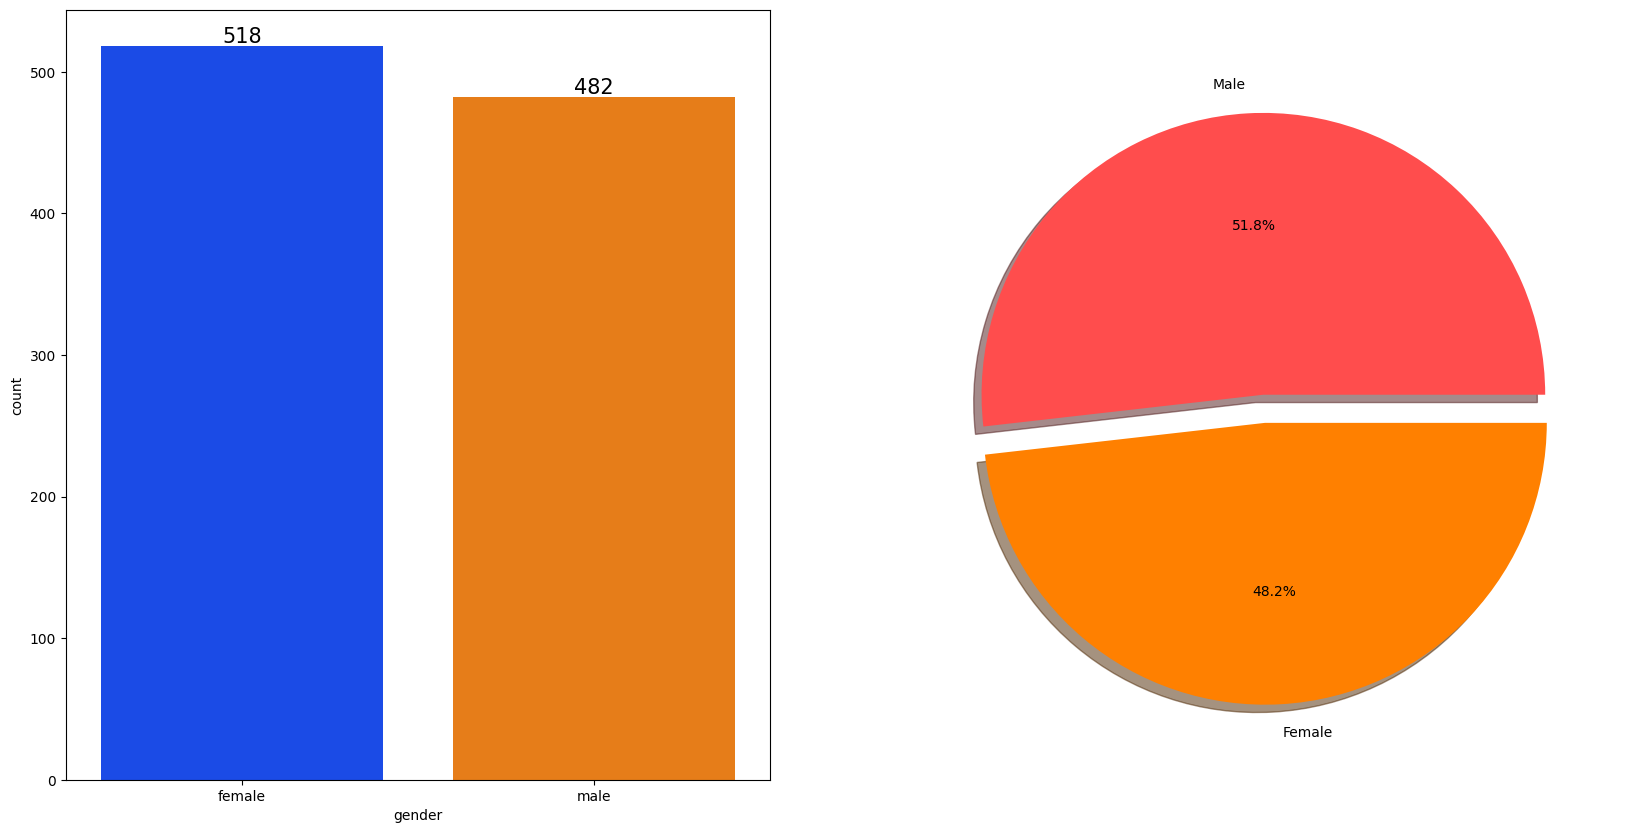

In [27]:
# UNIVARIATE ANALYSIS
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.8)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=15)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Insights:

### Overall balanced data acc to Gender. No gender bias
### Female - 518, Male - 482

In [28]:
# BIVARIATE ANALYSIS
numeric_df = df.select_dtypes(include=['int64', 'float64'])
gender_group = numeric_df.groupby(df['gender']).mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


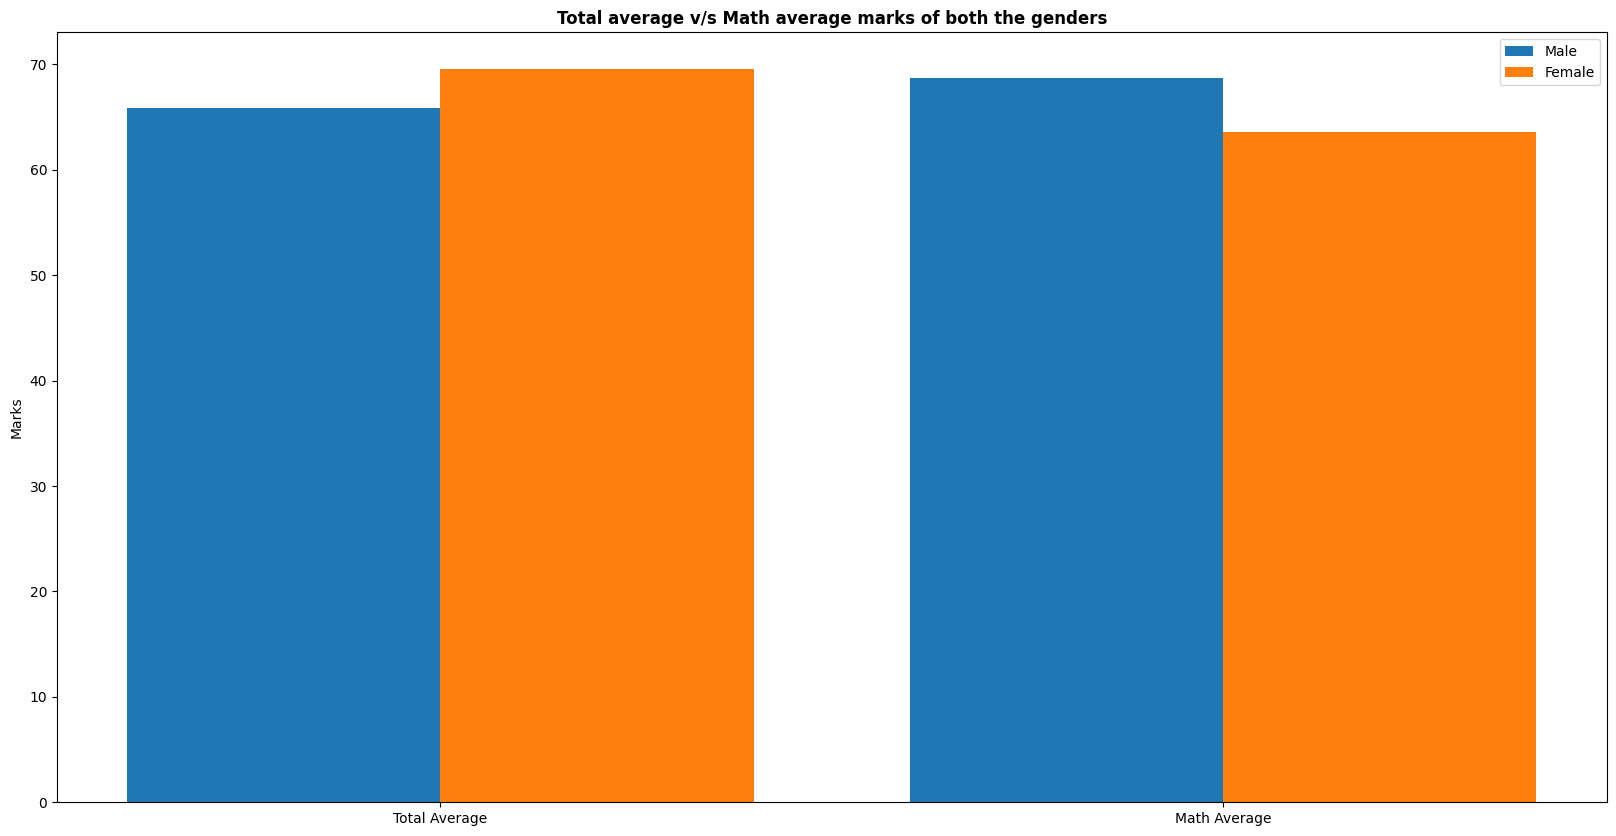

In [29]:
plt.figure(figsize=(20,10))

X=['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()

## Insights
### 1) Total average of Female is higher than Males
### 2) Math average of Males is higher than Females

## RACE/ETHNICITY COLUMN

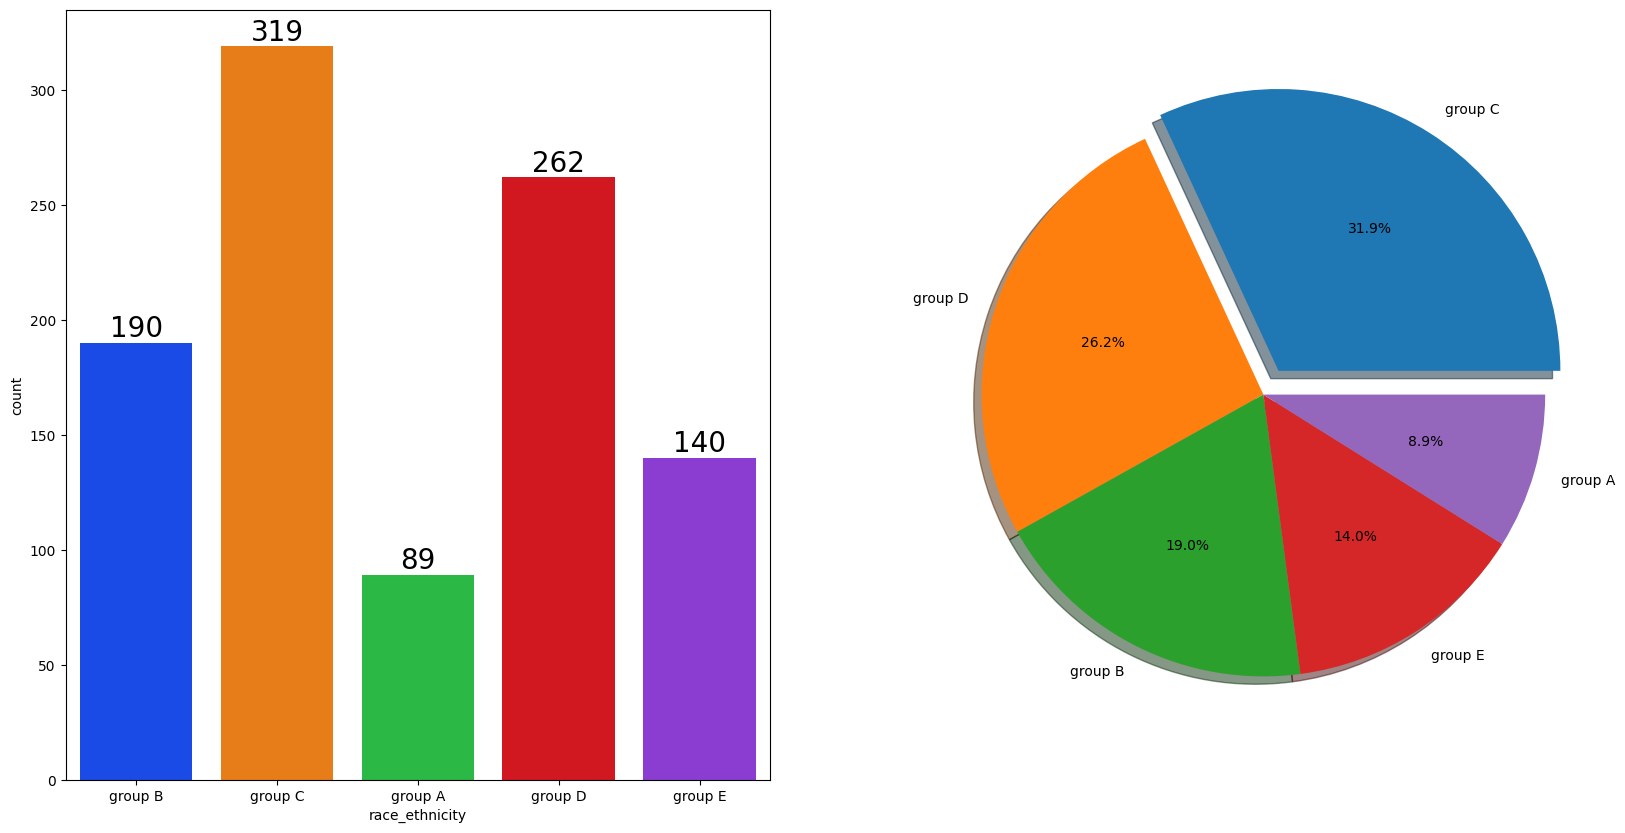

In [30]:
# UNIVARIATE ANALYSIS
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.8)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

## Insights
### Most of the students belong to Group C followed by Group D
### Lowest number of student belong to Group A

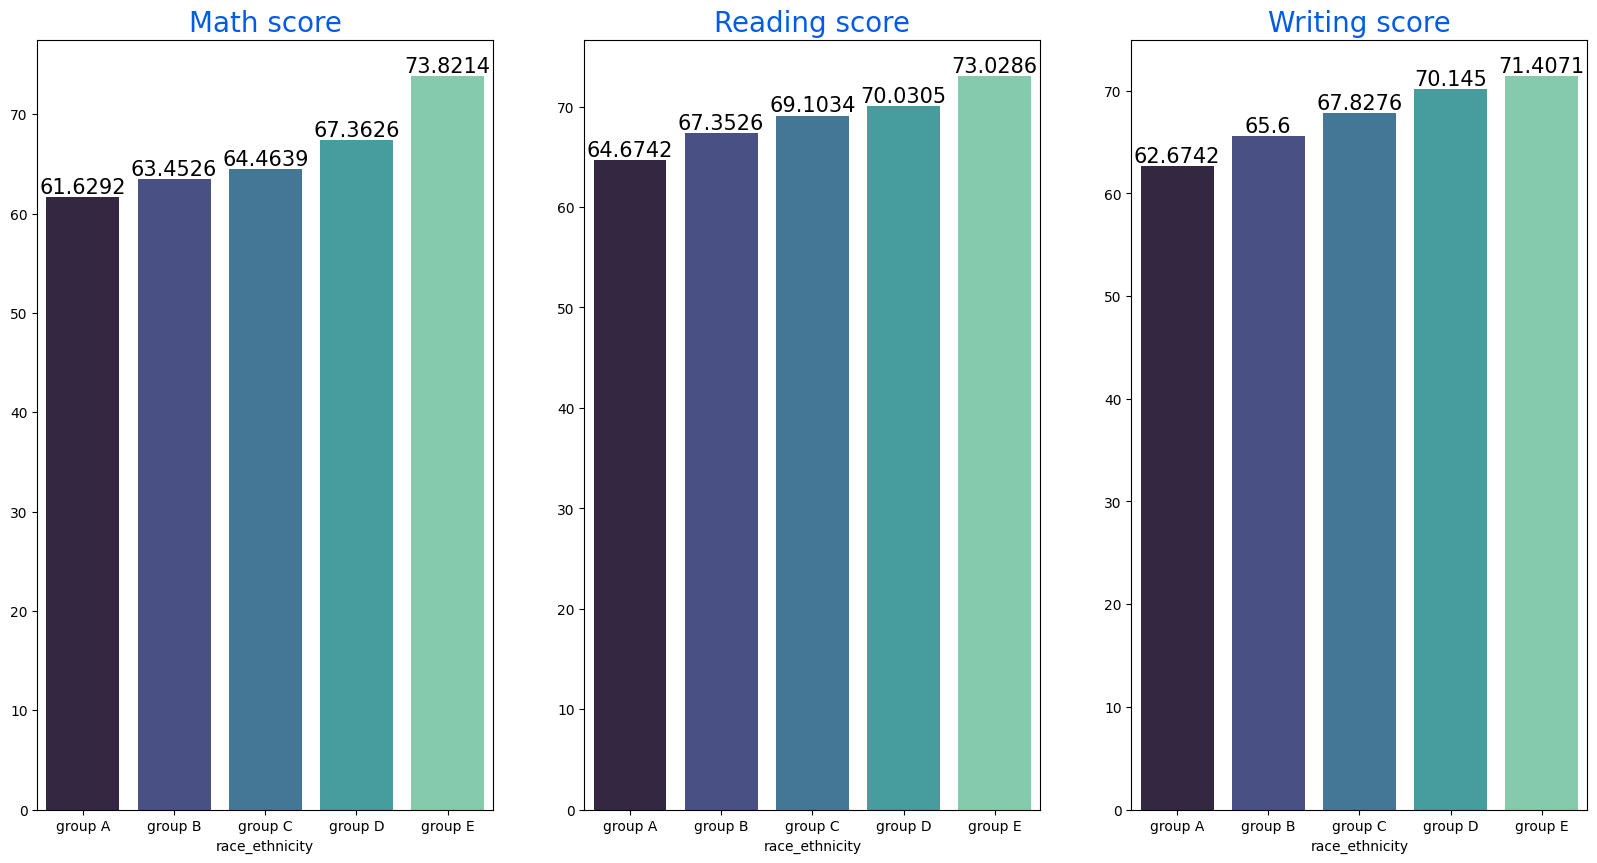

In [31]:
# BIVARIATE ANALYSIS
race_group_data = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,10))

sns.barplot(x=race_group_data['math_score'].mean().index, y=race_group_data['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_group_data['reading_score'].mean().index, y=race_group_data['reading_score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
  ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_group_data['writing_score'].mean().index, y=race_group_data['writing_score'].mean().values, palette='mako', ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
  ax[2].bar_label(container,color='black',size=15)

## Insights
### 1) Group E students have scored the highest
### 2) Group A students have scored the lowest marks

## PARENTAL LEVEL OF EDUCATION

In [32]:
# UNIVARIATE ANALYSIS
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='bright')
plt.title('Comparison of Parental education', fontweight=20, fontsize=15)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

### Largest number of parents are from some college

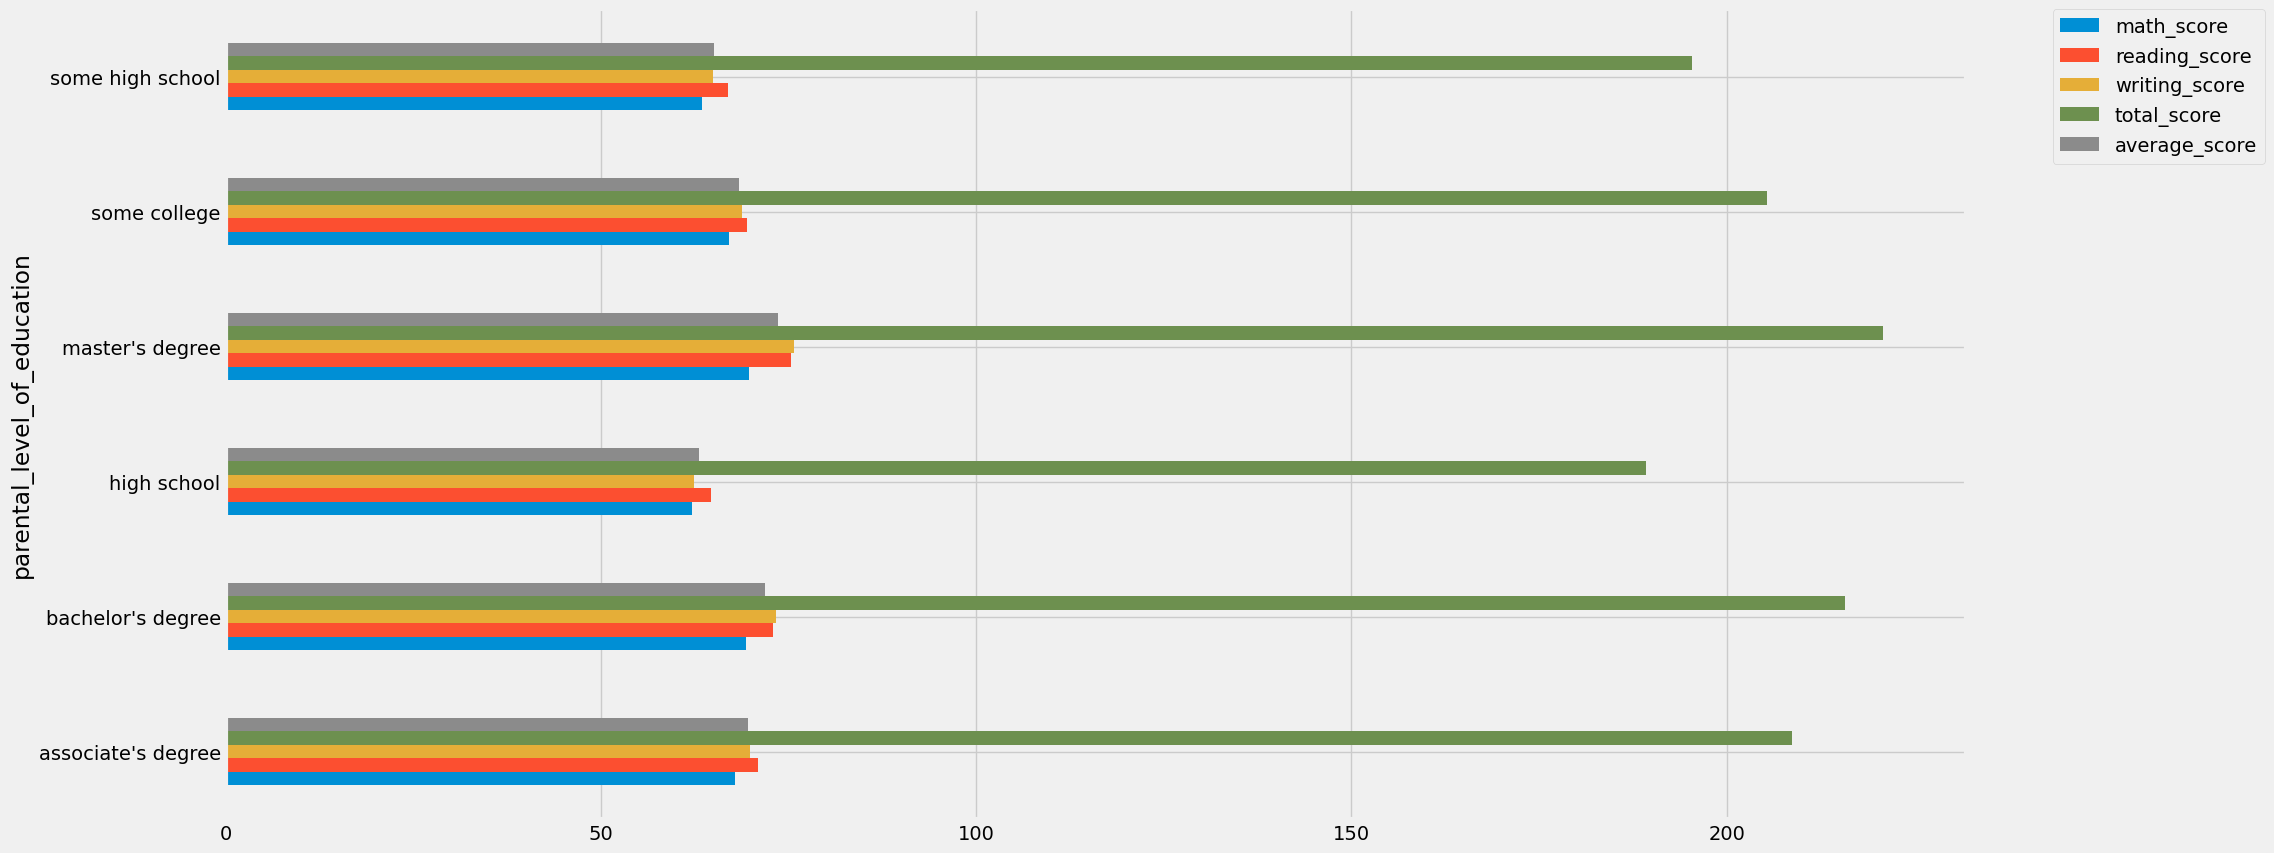

In [ ]:
# BIVARIATE ANALYSIS
numeric_df = df.select_dtypes(include=['int64', 'float64'])
ax = numeric_df.groupby(df['parental_level_of_education']).agg('mean').plot(kind='barh', figsize=(20,10))
ax.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

## Insights
### 1) The maximum total score is scored by parents having a masters degree, and the lowest is of high school parents.
### 2) the maxi average marks are from parents with masters degree, and the lowest is high school
### 3) The maxi writing marks are scored by parents with masters degree, whereas high school parents have the lowest.
### 4) The maxi reading marks are scored by parents with masters degree, whereas high school parents have the lowest.
### 5) The number of students with the highest math scores are from masters, bachelors, associates degree. Whereas lowest math scores are from high and some high school parents.

## LUNCH COLUMN

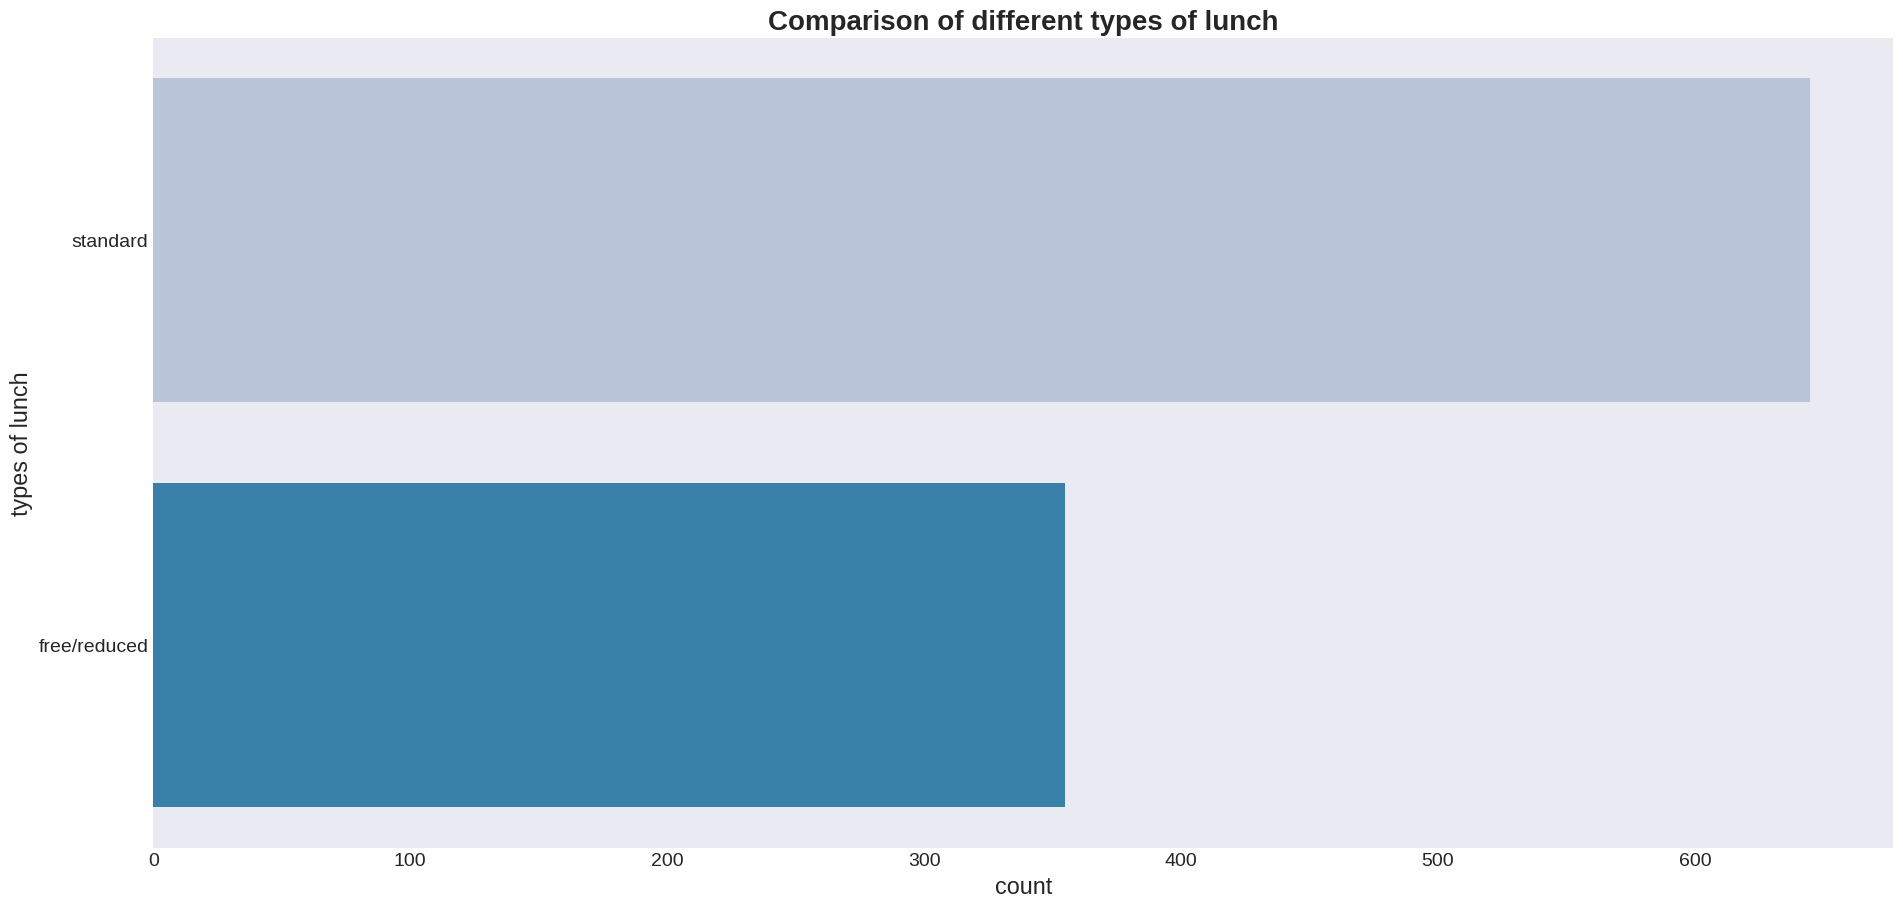

In [ ]:
# UNIVARIATE ANALYSIS
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('seaborn-v0_8-dark')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.ylabel('types of lunch')
plt.xlabel('count')
plt.show()

## Insights
### Students being served standard lunch are more.

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


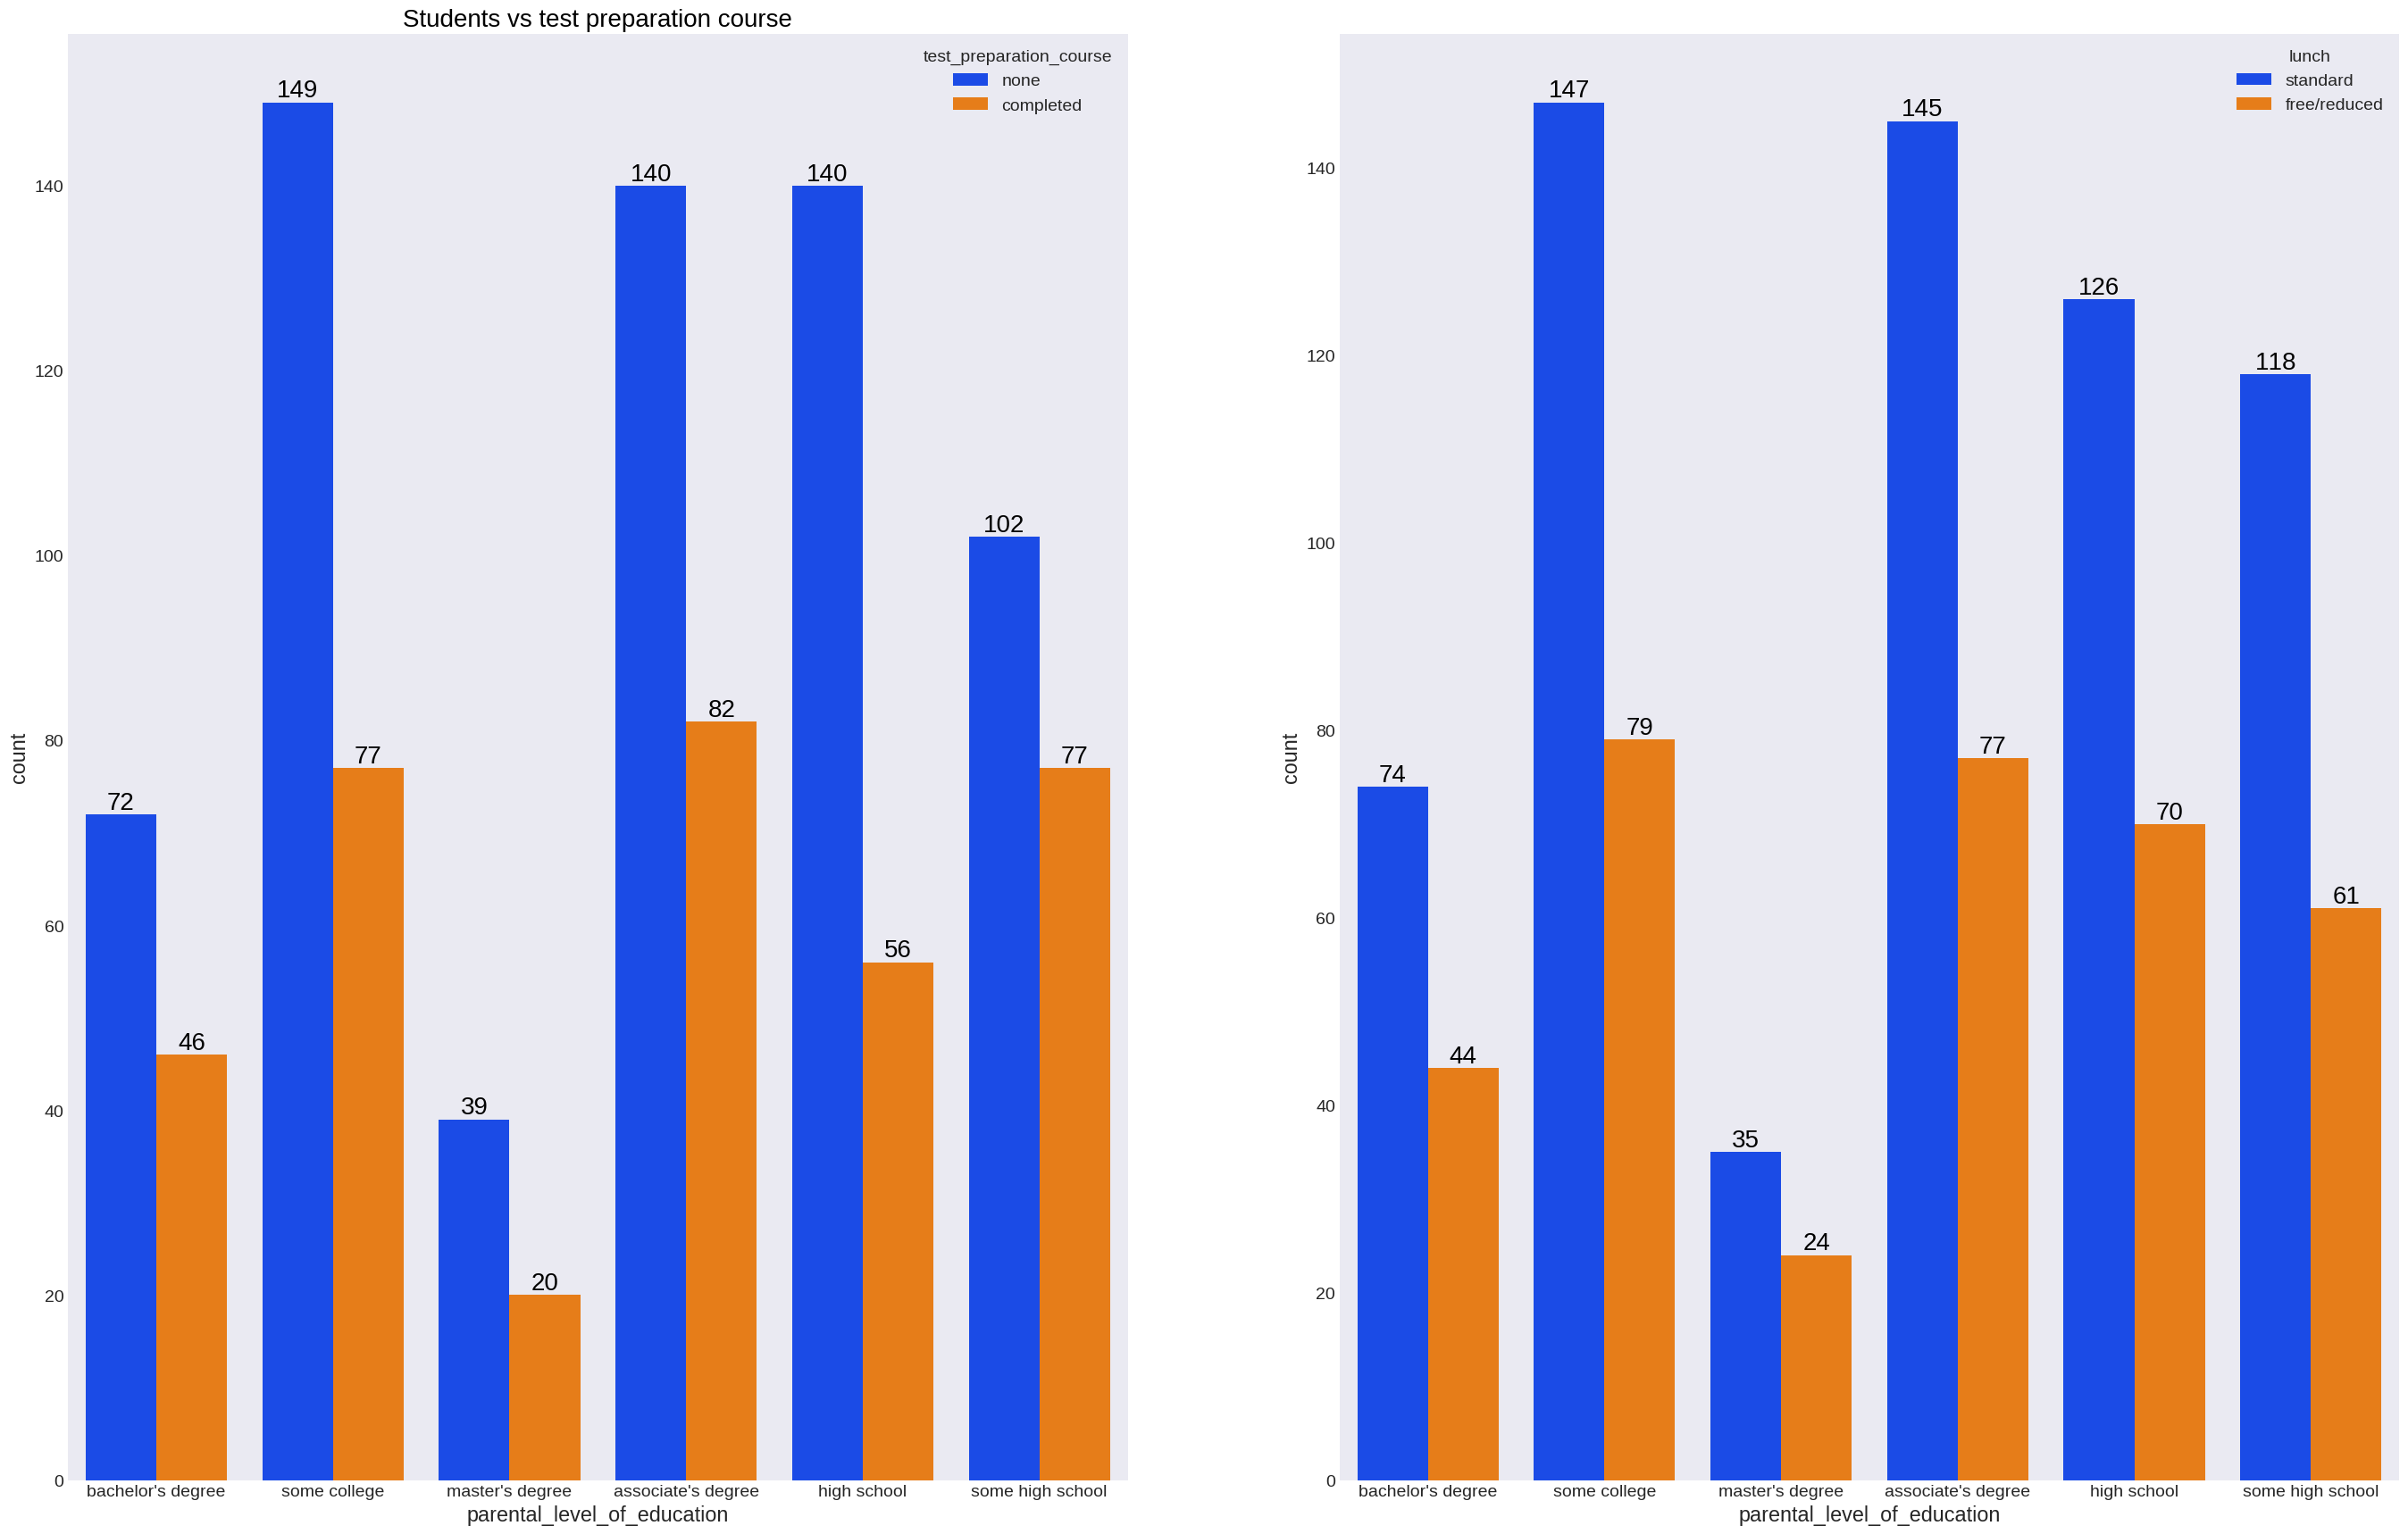

In [ ]:
# BIVARIATE ANALYSIS
f,ax=plt.subplots(1,2,figsize=(30,20))

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.8, ax=ax[0])
ax[0].set_title('Students vs test preparation course', color='black', size=20)

for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.8, ax=ax[1])
for container in ax[1].containers:
  ax[1].bar_label(container,color='black',size=20)

### Students with standard lunch perform better

## TEST PREPARATION COURSE COLUMN

<Axes: xlabel='lunch', ylabel='writing_score'>

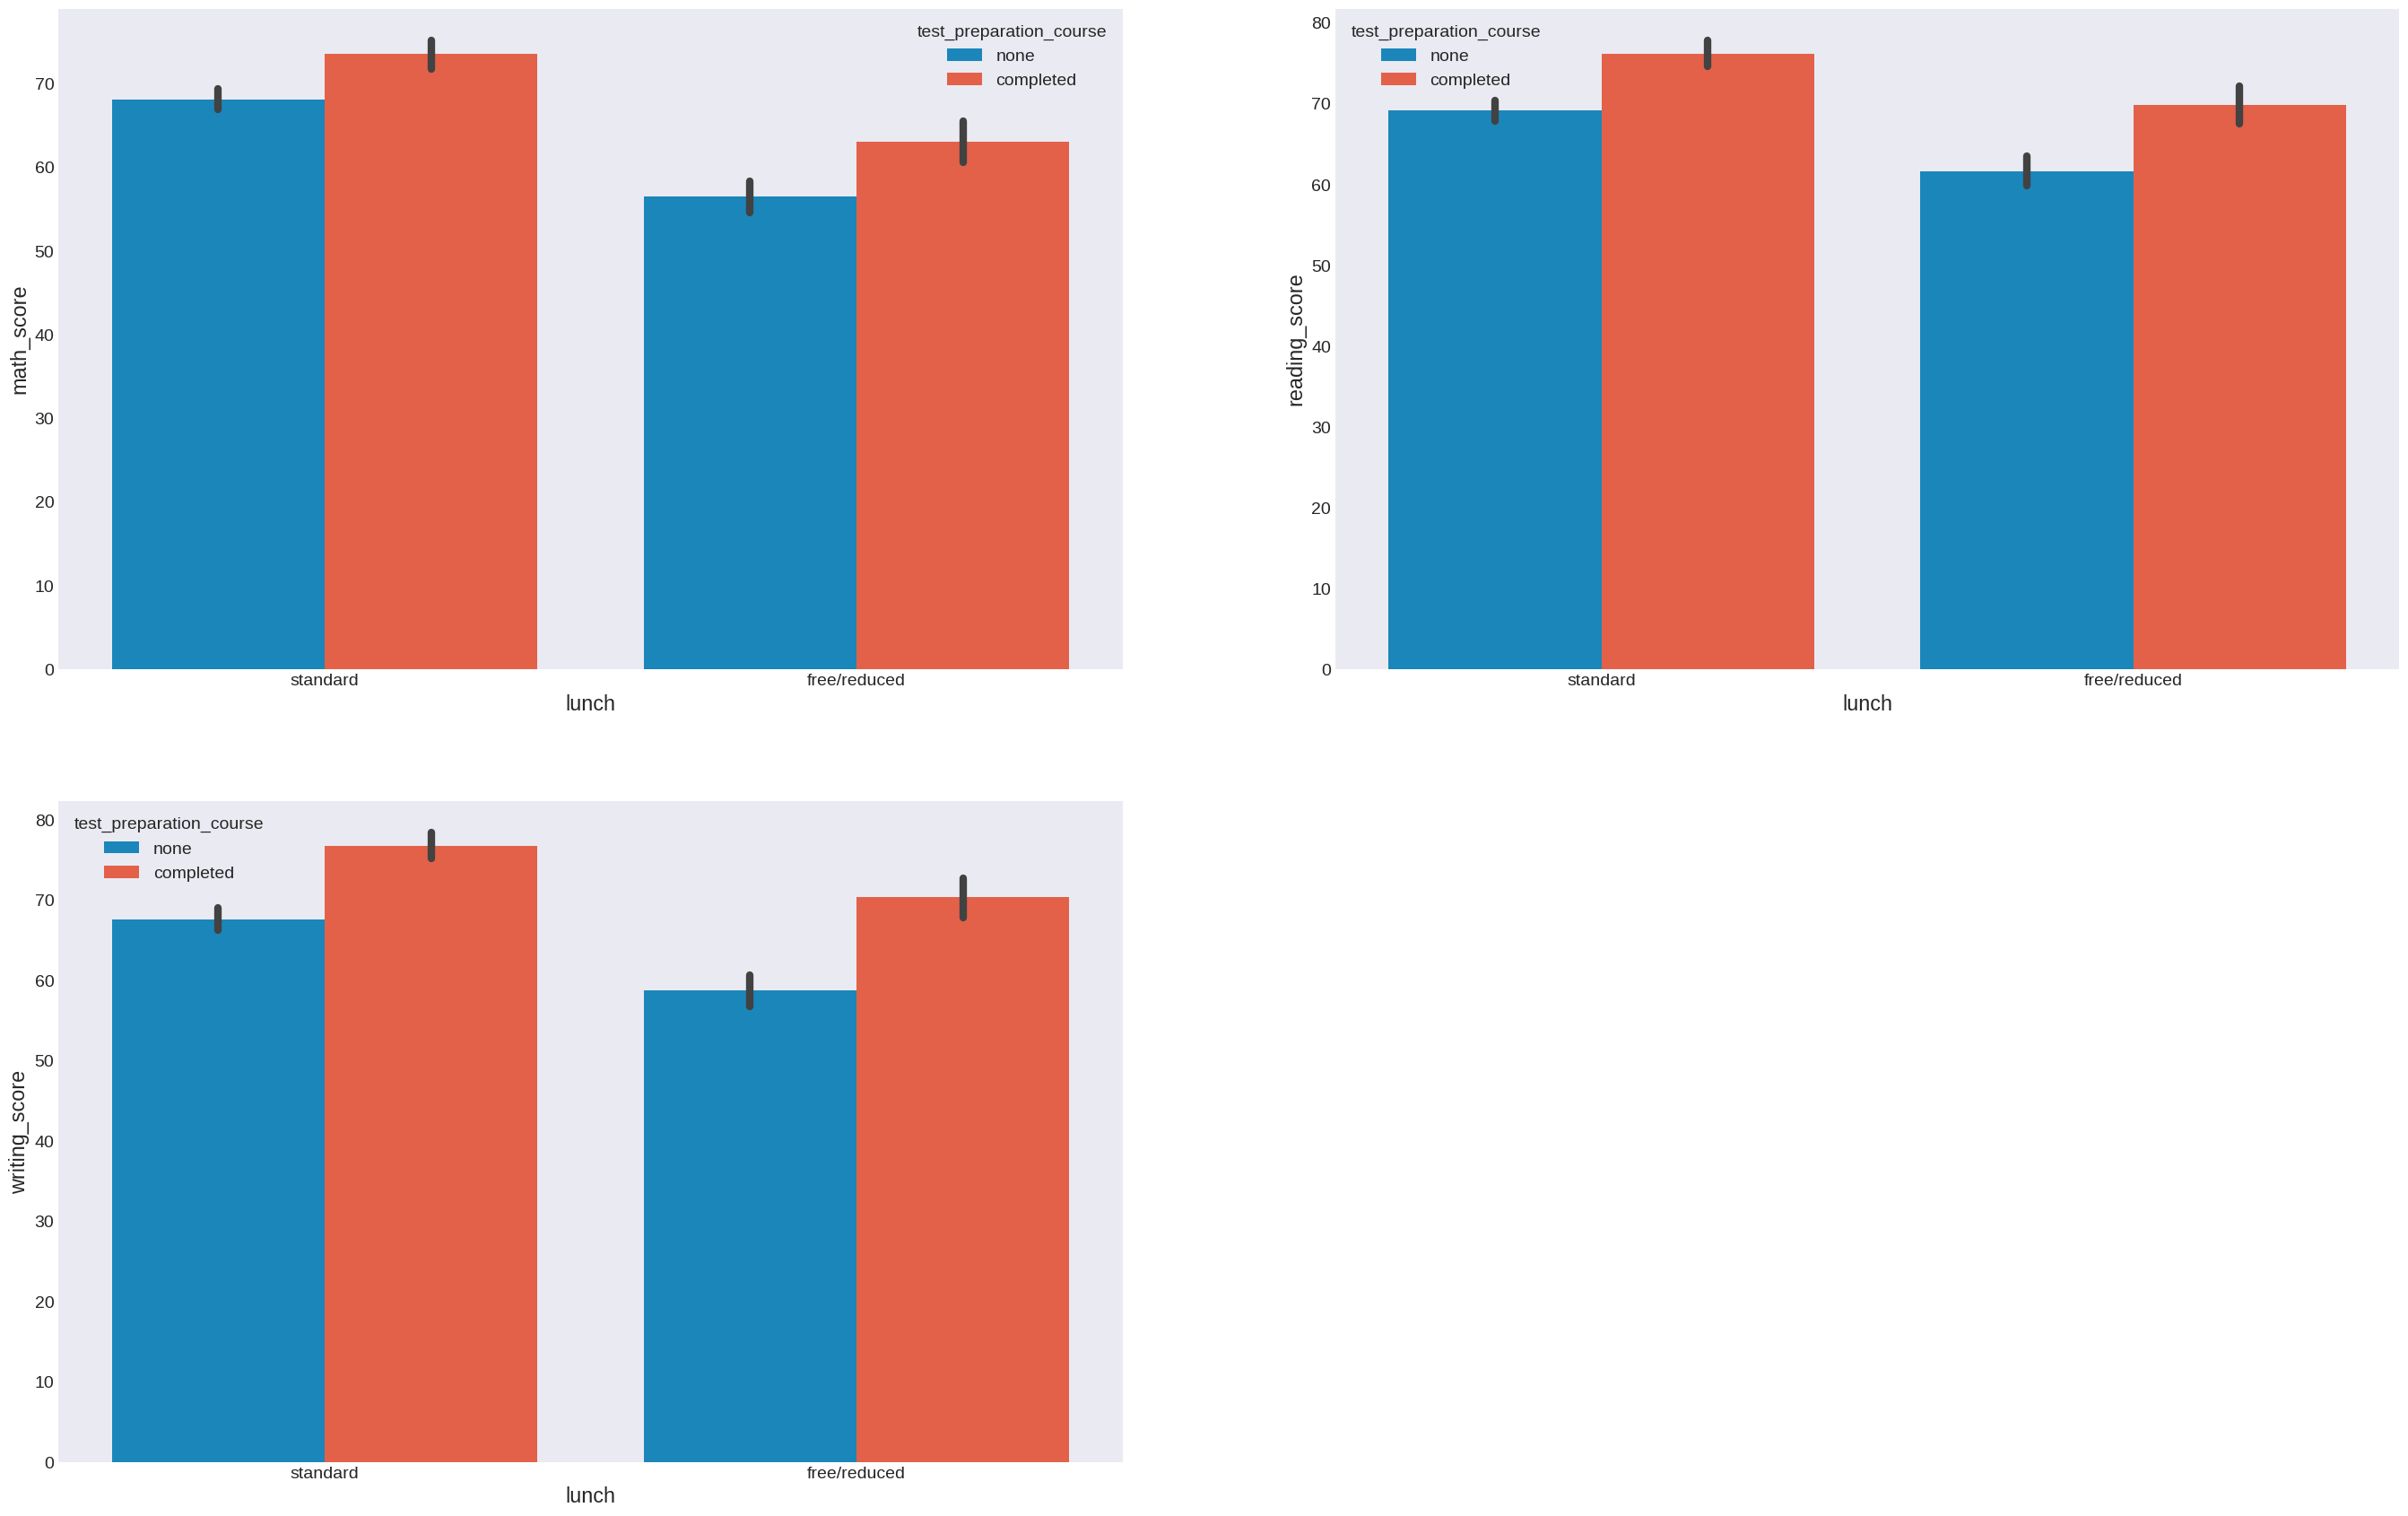

In [ ]:
# BIVARIATE ANALYSIS
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

### Students who have completed the test prep have scores higher in all 3 categories compared to those who have not taken the course

## CHECKING OUTLIERS

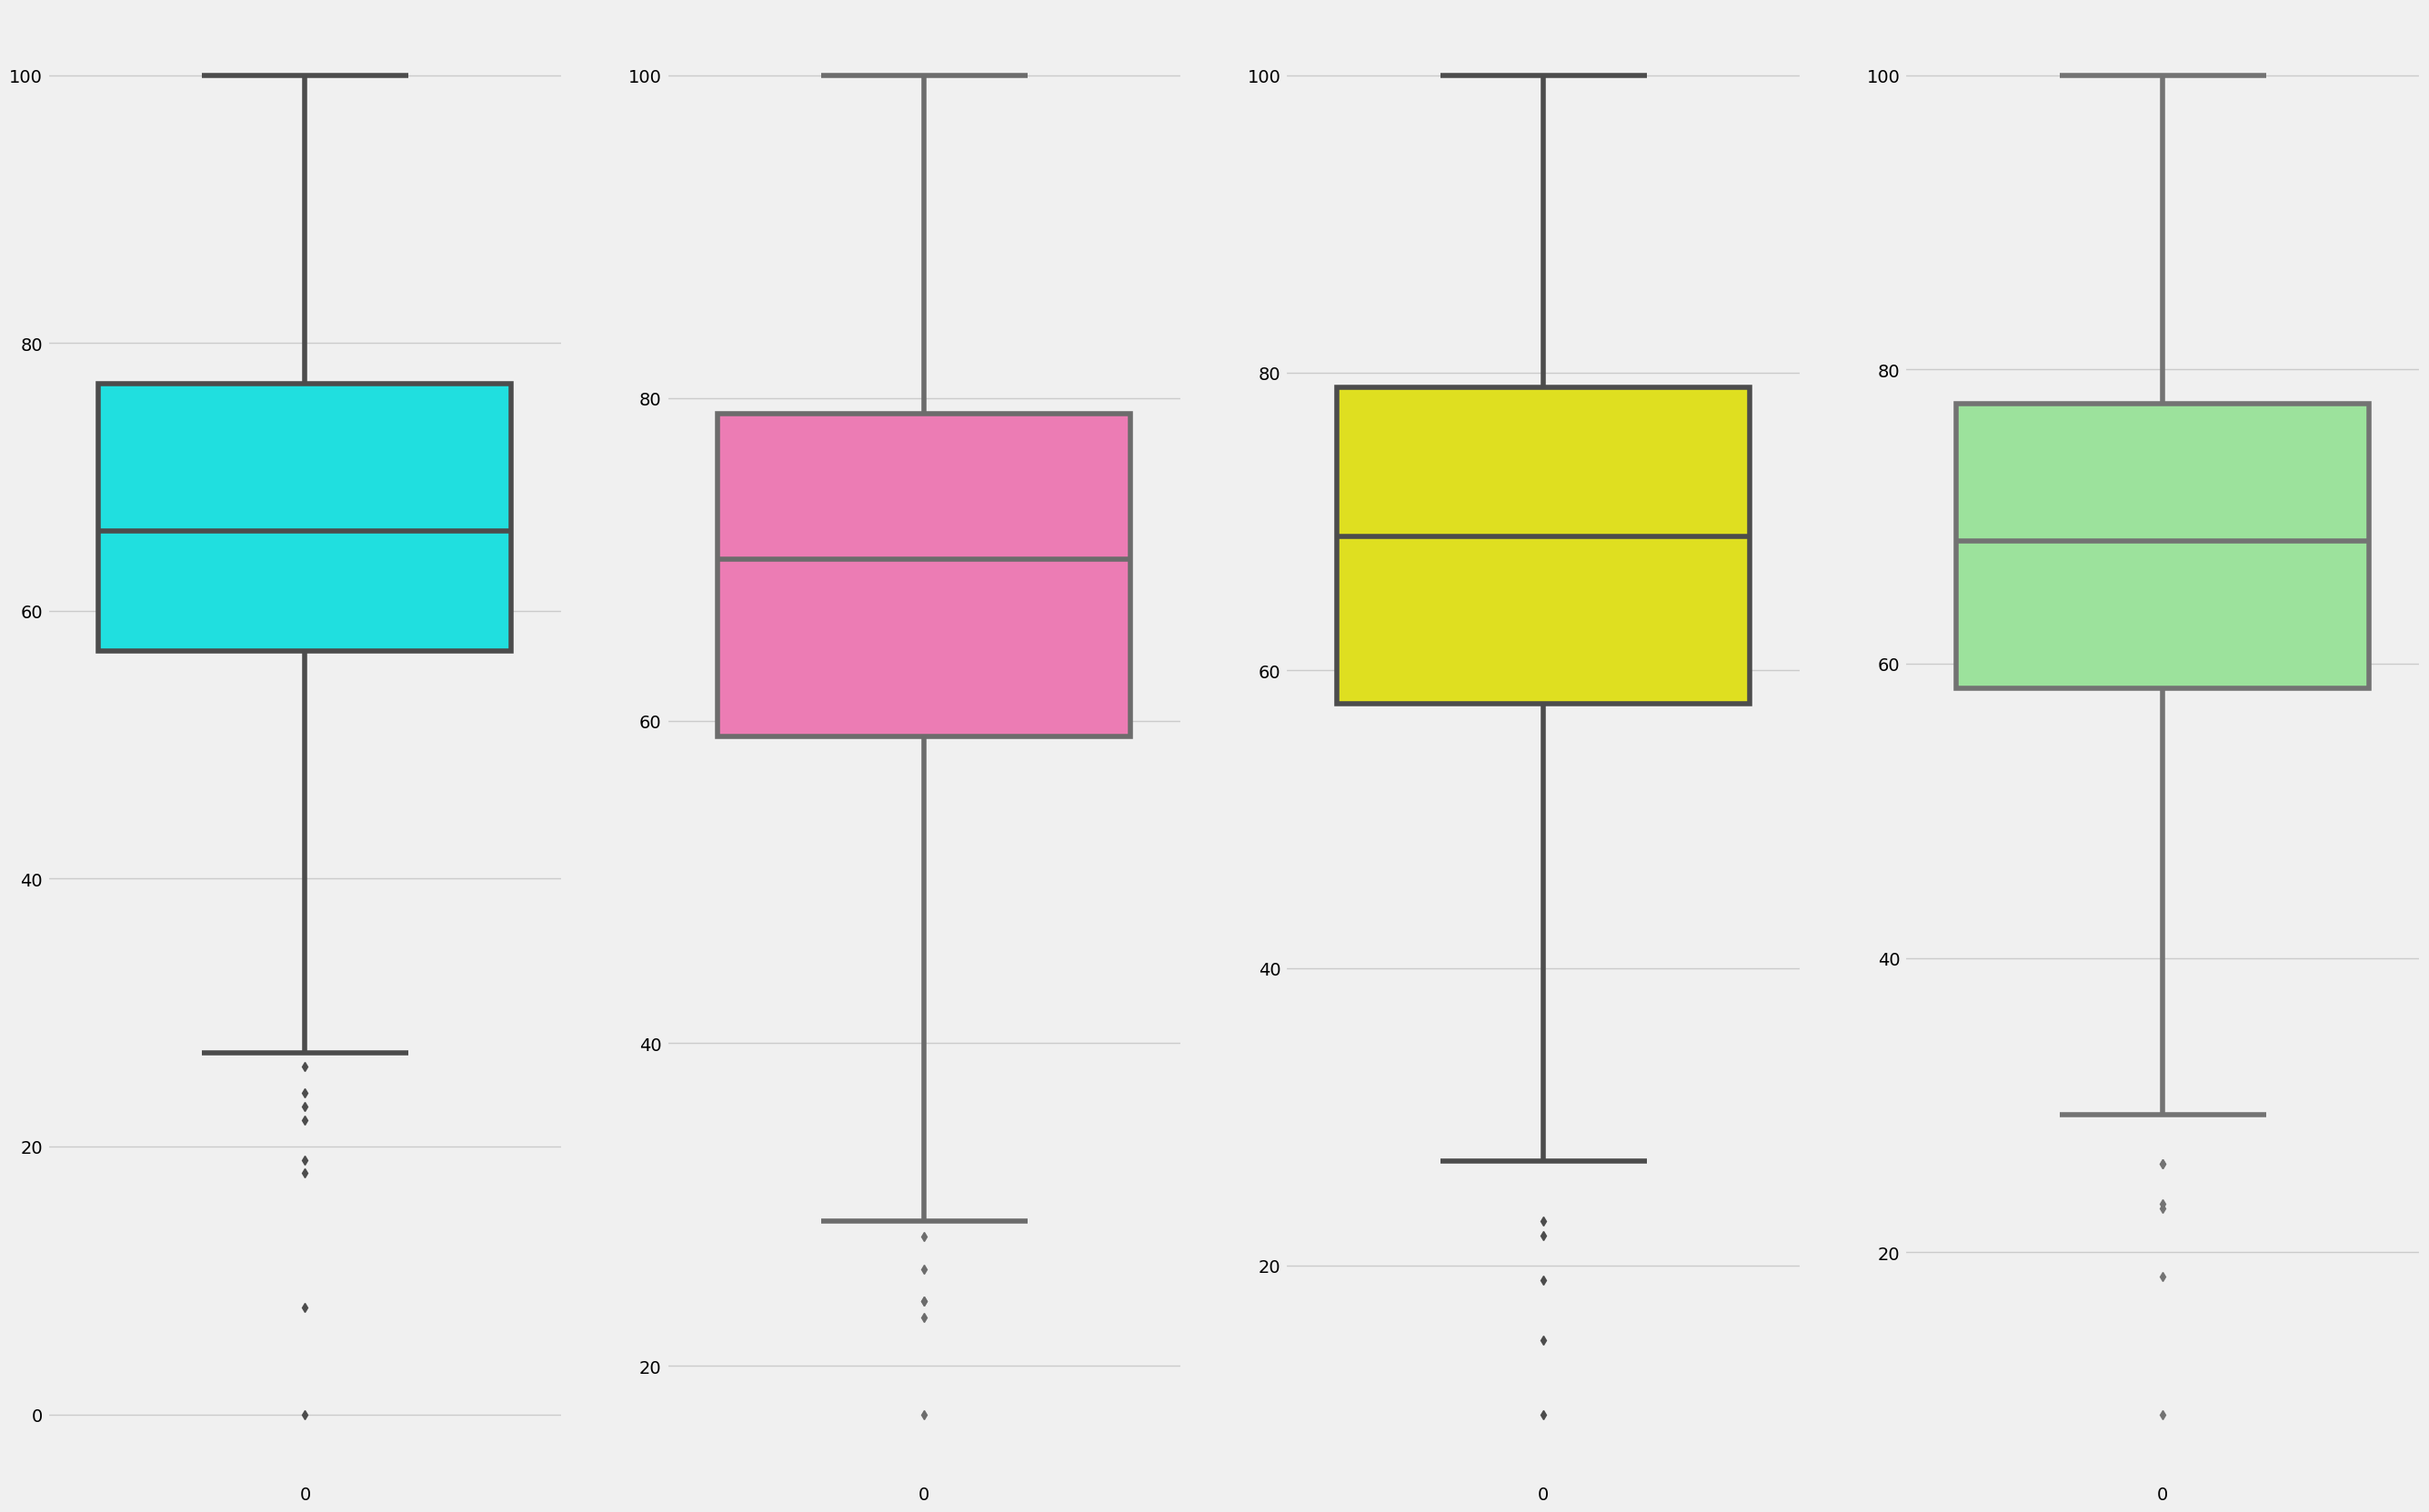

In [33]:
plt.subplots(1,4,figsize=(30,20))
plt.subplot(141)
sns.boxplot(df['math_score'], color='cyan')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'], color='lightgreen')
plt.show()

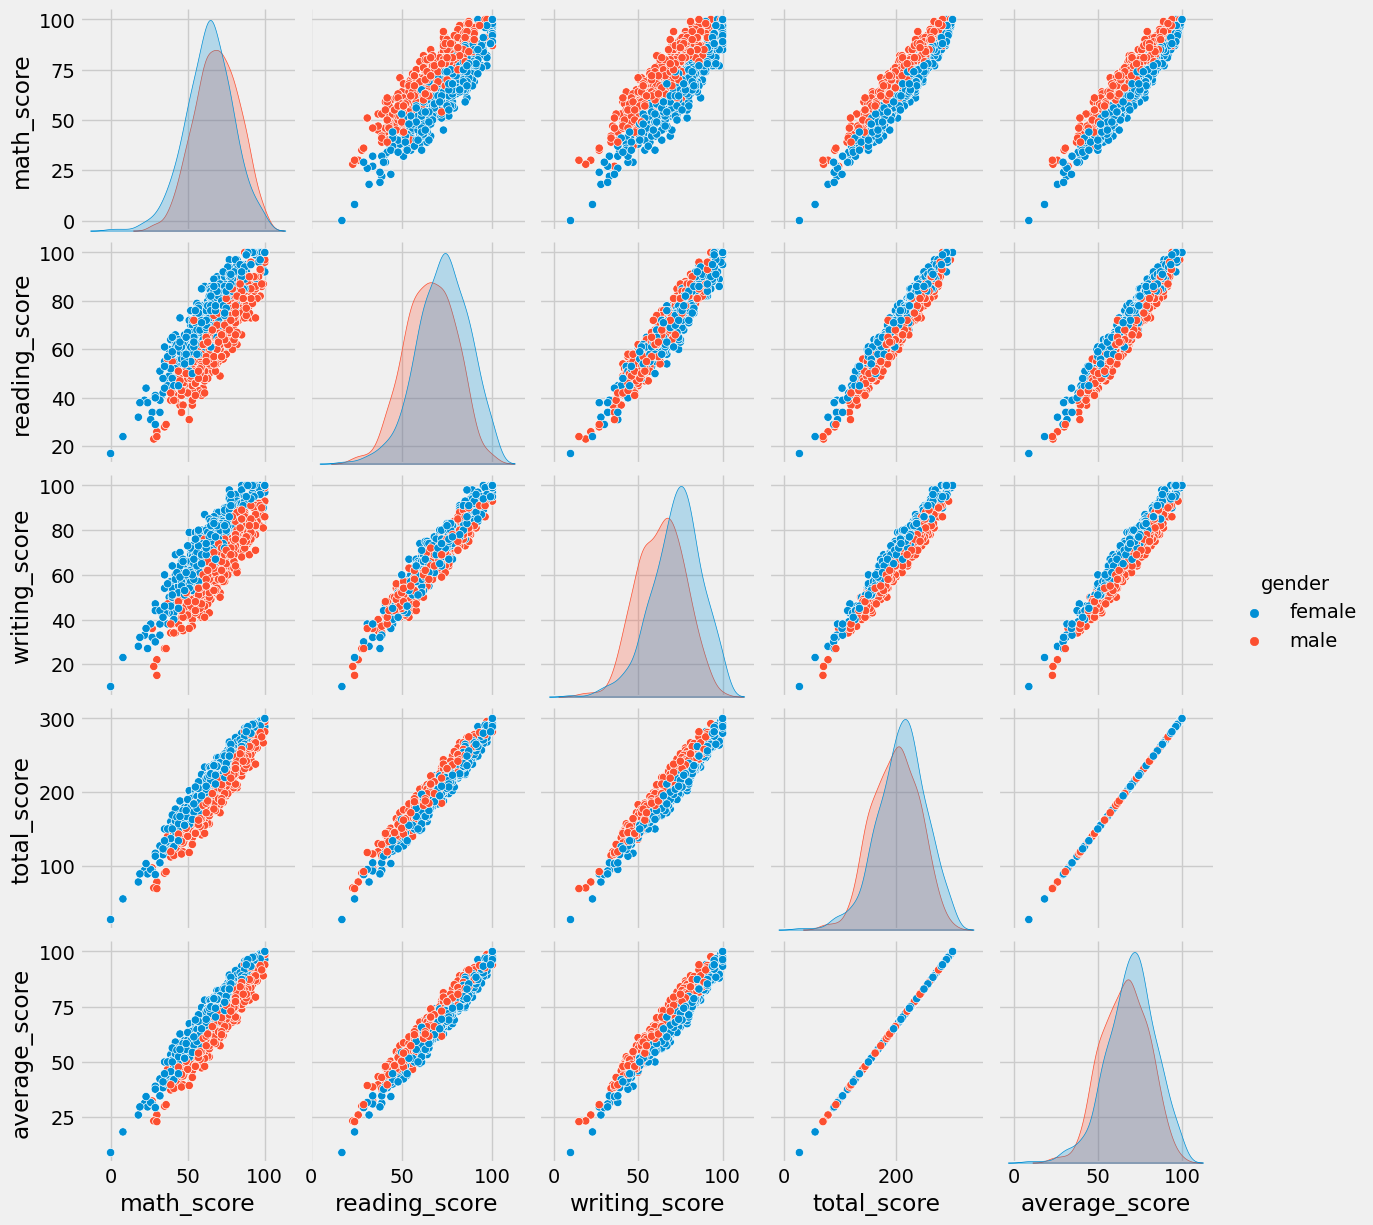

In [34]:
# MULTIVARIATE ANALYSIS
sns.pairplot(df, hue='gender')
plt.show()

## Insights
### Scores are increasing linearly.

# CONCLUSIONS:

### 1) Females lead in passing and are the top-scorers
### 2) Students performance are related with lunch, race, parental education
### 3) Students performance is not much related with the test prep
### 4) Finishing course prep is beneficial